# A3Q6

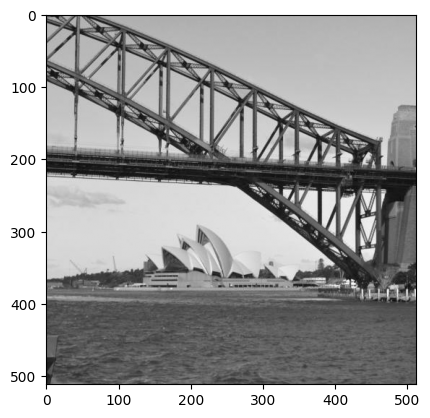

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2

# Load the grayscale image
f = np.array(plt.imread('operahall.png'), dtype=float)
plt.imshow(f, cmap='gray')

## (a)

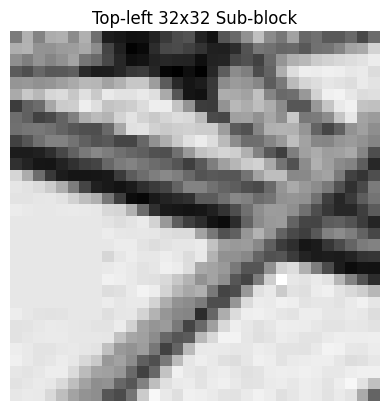

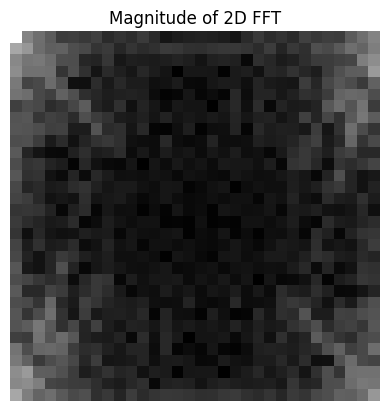

Brightest pixel value: 519.2353082075715


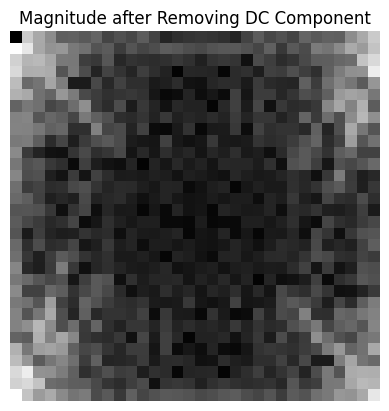

In [2]:
# Extract the top-left 32x32 sub-block
sub_block = f[:32, :32]

# Plot the sub-block
plt.imshow(sub_block, cmap='gray')
plt.title('Top-left 32x32 Sub-block')
plt.axis('off')
plt.show()

# Compute 2D FFT
F = fft2(sub_block)

# Plot magnitude spectrum
plt.imshow(np.log1p(np.abs(F)), cmap='gray')
plt.title('Magnitude of 2D FFT')
plt.axis('off')
plt.show()

# The brightest pixel in the magnitude plot represents the DC component,
# which captures the average intensity of the image block.
# The high-frequency components encode sharp edges and fine details.
Fmax = np.max(np.abs(F))
print("Brightest pixel value:", Fmax)

# Zero out the DC coefficient (at top-left corner)
F[0, 0] = 0

# Plot after zeroing DC coefficient
plt.imshow(np.log1p(np.abs(F)), cmap='gray')
plt.title('Magnitude after Removing DC Component')
plt.axis('off')
plt.show()

## (b)

In [3]:
def Compress(X, tol):
    Y = np.zeros_like(X)
    total_nonzero = 0
    dropped_nonzero = 0

    for i in range(0, X.shape[0], 32):
        for j in range(0, X.shape[1], 32):
            block = X[i:i + 32, j:j + 32]
            F = fft2(block)
            cur_nonzero = np.sum(F != 0)
            total_nonzero += cur_nonzero
            Fmax = np.max(np.abs(F))
            F[np.abs(F) <= Fmax * tol] = 0
            dropped_nonzero += cur_nonzero - np.sum(F != 0)
            Y[i:i + 32, j:j + 32] = np.real(ifft2(F))

    drop_ratio = dropped_nonzero / total_nonzero
    return Y, drop_ratio

## (c)

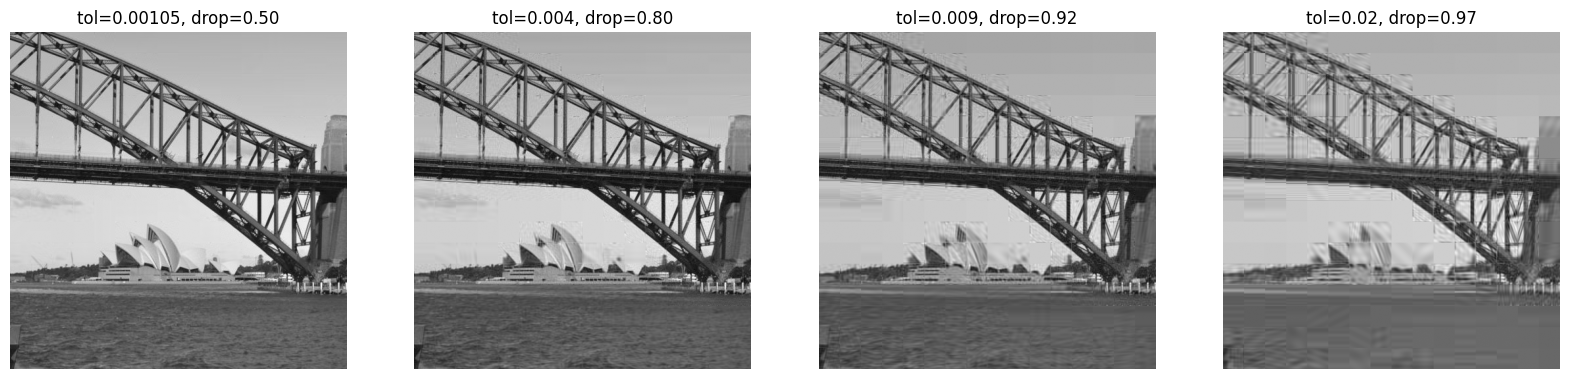

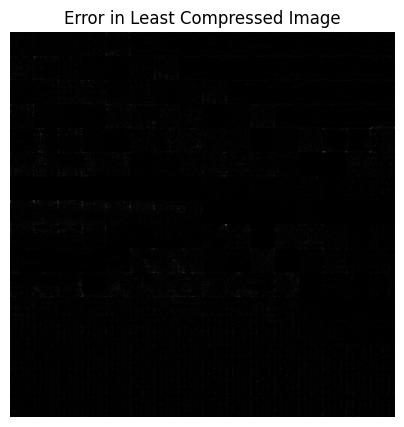

In [4]:
# Set tolerance values and compress the image
tol_values = [0.00105, 0.004, 0.009, 0.02]
compressed_images = []
drop_ratios = []

for tol in tol_values:
    Y, drop = Compress(f, tol)
    compressed_images.append(Y)
    drop_ratios.append(drop)

# Plot compressed images
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for i, tol in enumerate(tol_values):
    axes[i].imshow(compressed_images[i], cmap='gray')
    axes[i].set_title(f'tol={tol}, drop={drop_ratios[i]:.2f}')
    axes[i].axis('off')
plt.show()

# Visualize error for the least compressed image
error_image = np.abs(f - compressed_images[0])
plt.figure(figsize=(5, 5))
plt.imshow(error_image, cmap='gray')
plt.title('Error in Least Compressed Image')
plt.axis('off')
plt.show()